In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

The data at hand contains medical costs of people characterized by certain attributes

Context:

Leveraging customer information is paramount for most businesses. In the case
of an insurance company, attributes of customers like the ones mentioned
below can be crucial in making business decisions. Hence, knowing to explore
and generate value out of such data can be an invaluable skill to have.

Attribute Information: 

age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^
2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of
dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.
charges: Individual medical costs billed by health insurance.

In [5]:
df=pd.read_csv("insurance (2).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.shape

(1338, 7)

In [17]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [24]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

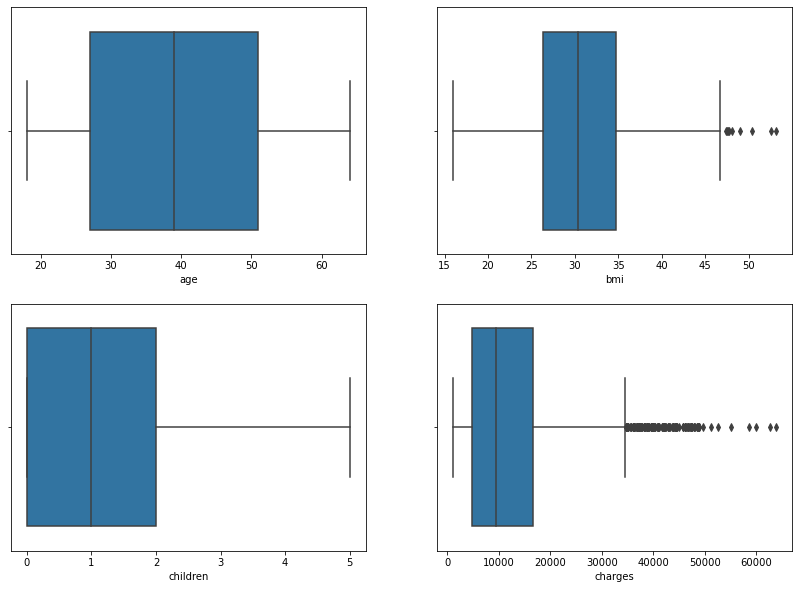

In [42]:
fig, ax = plt.subplots(2,2, figsize=(14, 10))
sns.boxplot(x=df['age'],ax=ax[0,0])
sns.boxplot(x=df['bmi'],ax=ax[0,1])
sns.boxplot(x=df['children'],ax=ax[1,0])
sns.boxplot(x=df['charges'],ax=ax[1,1])
plt.show()

Median - 40
lower limit-60+
upper limit-less than 20
25th quantile- 25+
75th quamtile-50+

Median - 30+
lower limit-15+
upper limit-less than 45
25th quantile- 25+
75th quamtile-50+


Median - 1
lower limit-60+
upper limit-less than 20
25th quantile- 25+
75th quamtile-50+

Median - 10000
lower limit-60+
upper limit-less than 20
25th quantile- 25+
75th quamtile-50+


From the above box plot we can see the 25 ,50th,75th, lower and upper limit of the data.
Addtionally we can see outliers in the bmi and charges

C:\Users\siva\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\siva\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\siva\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Charges')

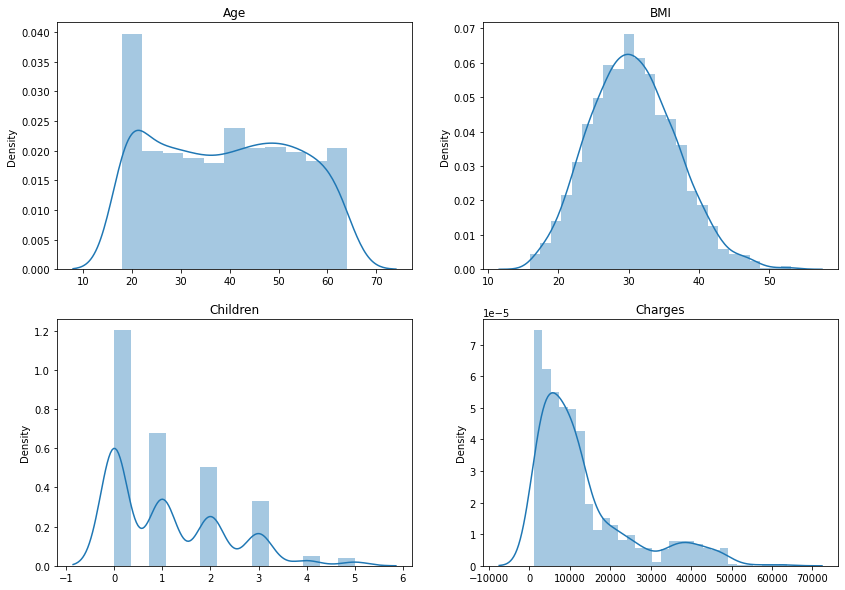

In [50]:
fig, ax = plt.subplots(2,2, figsize=(14, 10))
sns.distplot(x=df['age'],ax=ax[0,0])
sns.distplot(x=df['bmi'],ax=ax[0,1])
sns.distplot(x=df['children'],ax=ax[1,0])
sns.distplot(x=df['charges'],ax=ax[1,1])
ax[0,0].set_title('Age')
ax[0,1].set_title('BMI')
ax[1,0].set_title('Children')
ax[1,1].set_title('Charges')

In [61]:
print("age skew: ",df['age'].skew())
print("bmi skew: ",df['bmi'].skew())
print("children skew: ",df['children'].skew())
print("charges skew: ",df['charges'].skew())

age skew:  0.05567251565299186
bmi skew:  0.2840471105987448
children skew:  0.9383804401702414
charges skew:  1.5158796580240388


From above graphs we can see distributions of the Numerical data, we can infer Medical charge is highly skewed does not follow normal distribution

Outlier Detection:

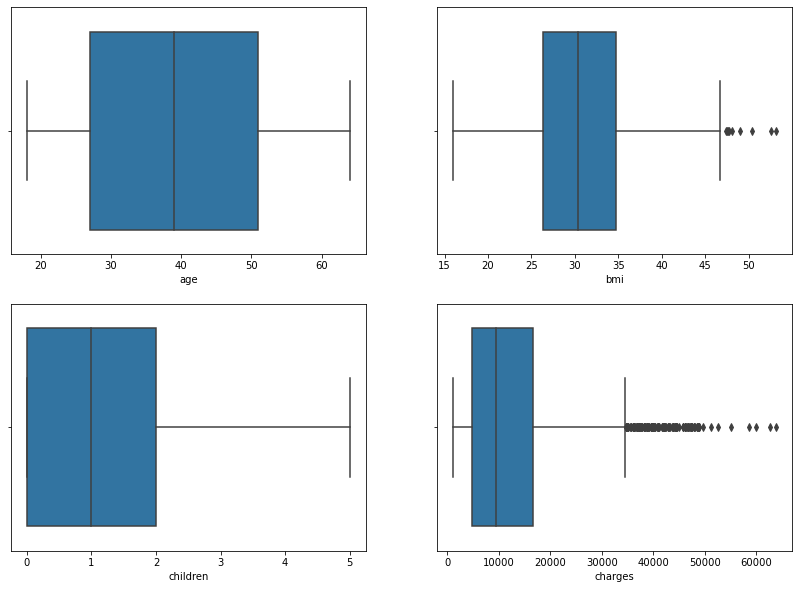

In [62]:
fig, ax = plt.subplots(2,2, figsize=(14, 10))
sns.boxplot(x=df['age'],ax=ax[0,0])
sns.boxplot(x=df['bmi'],ax=ax[0,1])
sns.boxplot(x=df['children'],ax=ax[1,0])
sns.boxplot(x=df['charges'],ax=ax[1,1])
plt.show()

The BMi and Charges has the outliers

Distribution of the categorical data:

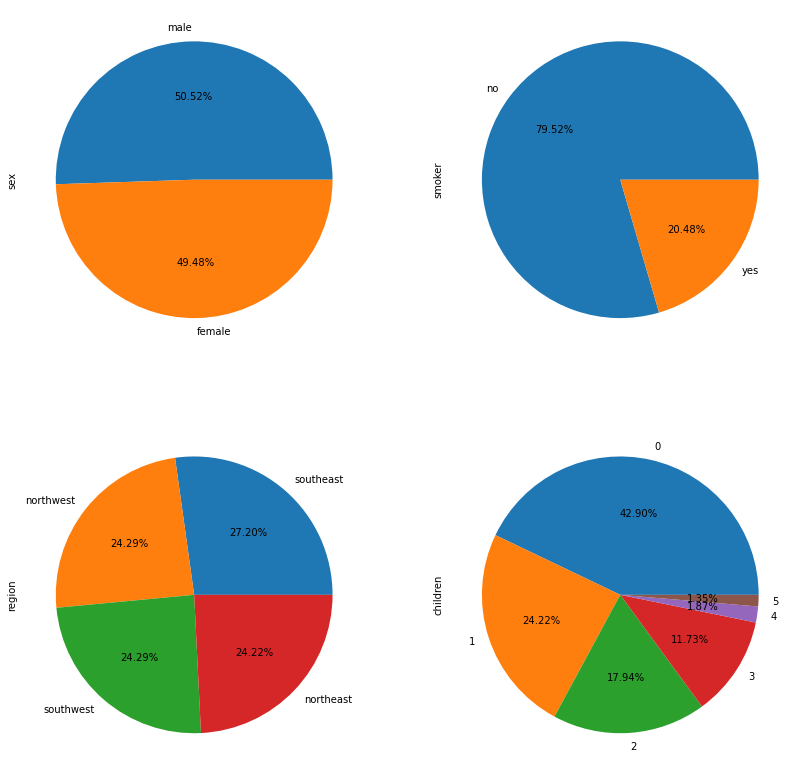

In [76]:
fig, ax = plt.subplots(2,2, figsize=(14, 14))
df['sex'].value_counts().plot(kind='pie',ax=ax[0,0],autopct='%1.2f%%')
df['smoker'].value_counts().plot(kind='pie',ax=ax[0,1],autopct='%1.2f%%')
df['region'].value_counts().plot(kind='pie',ax=ax[1,0],autopct='%1.2f%%')
df['children'].value_counts().plot(kind='pie',ax=ax[1,1],autopct='%1.2f%%')
plt.show()

Do charges of people who smoke differ significantly from the people who don't?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

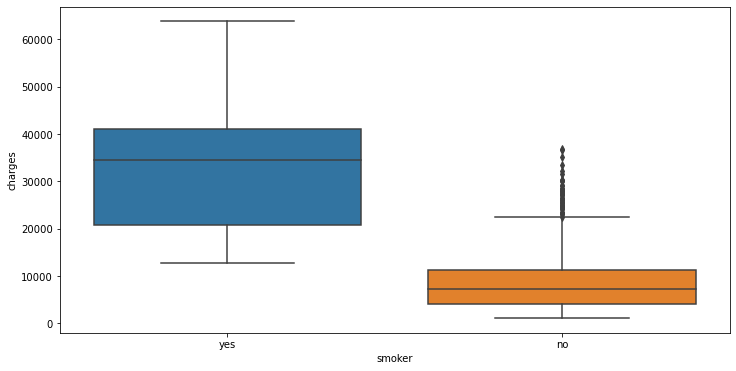

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['charges'],x=df['smoker'])

From the above boxplot we can see the medical charges increase with respect to the smoking(YES)

Let us check the statistic method to prove the hypothesis.

In [85]:
df_sm_yes=df[df['smoker']=='yes']['charges']
df_sm_no=df[df['smoker']=='no']['charges']
ttest_ind(df_sm_yes,df_sm_no)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

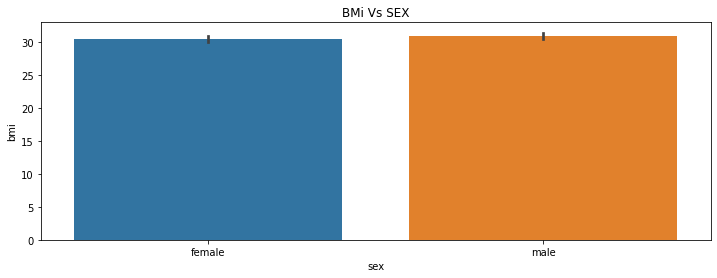

In [92]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['sex'],y=df['bmi'])
plt.title('BMi Vs SEX')
plt.show()

From the above bar graph we cannot see much difference in BMI with respect to the Gender
Let check the statestic method to prove it

In [96]:
df_bm_yes=df[df['sex']=='male']['bmi']
df_bm_no=df[df['sex']=='female']['bmi']
ttest_ind(df_bm_yes,df_bm_no)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

we can see the statiscal value for the 2 sample t test give 1.69 
which states there no differnece in the BMI with respect to the gender

Is the proportion of smokers significantly different in different
genders

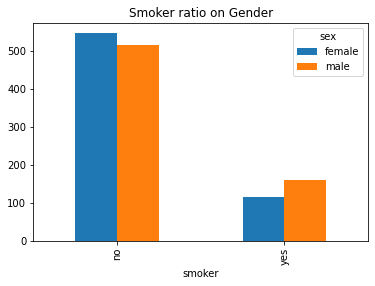

In [116]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.title('Smoker ratio on Gender')
plt.show()

Is the distribution of bmi across women with no children, one child
and two children, the same?

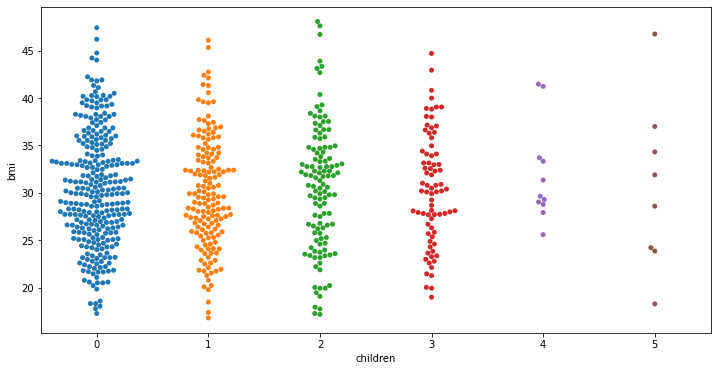

In [114]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=df['children'],y=df[df['sex']=='female']['bmi'])
plt.show()

In [ ]:
As